[[ 0.00566707  0.2818952   0.11099752]
 [ 0.1652705   0.24374816  0.1878875 ]
 [ 0.24653725  0.1307608   0.32721803]
 [ 0.2854419  -0.33073744  0.12322184]
 [-0.12814306  0.35800686  0.12803975]
 [-0.21821913  0.32344642  0.24134605]
 [-0.28731233  0.27928612  0.25121662]
 [ 0.19508517  0.38986328  0.46321878]
 [ 0.18017356  0.34172803  0.80917513]
 [ 0.12182617  0.3131615   0.97187513]
 [ 0.18058269  0.29763043  1.1156043 ]
 [ 0.00197128  0.36459234  0.4197161 ]
 [-0.02983068  0.25476894  0.66594017]
 [ 0.01200663  0.25023893  0.76980454]
 [-0.01228828  0.27118042  0.82101035]]


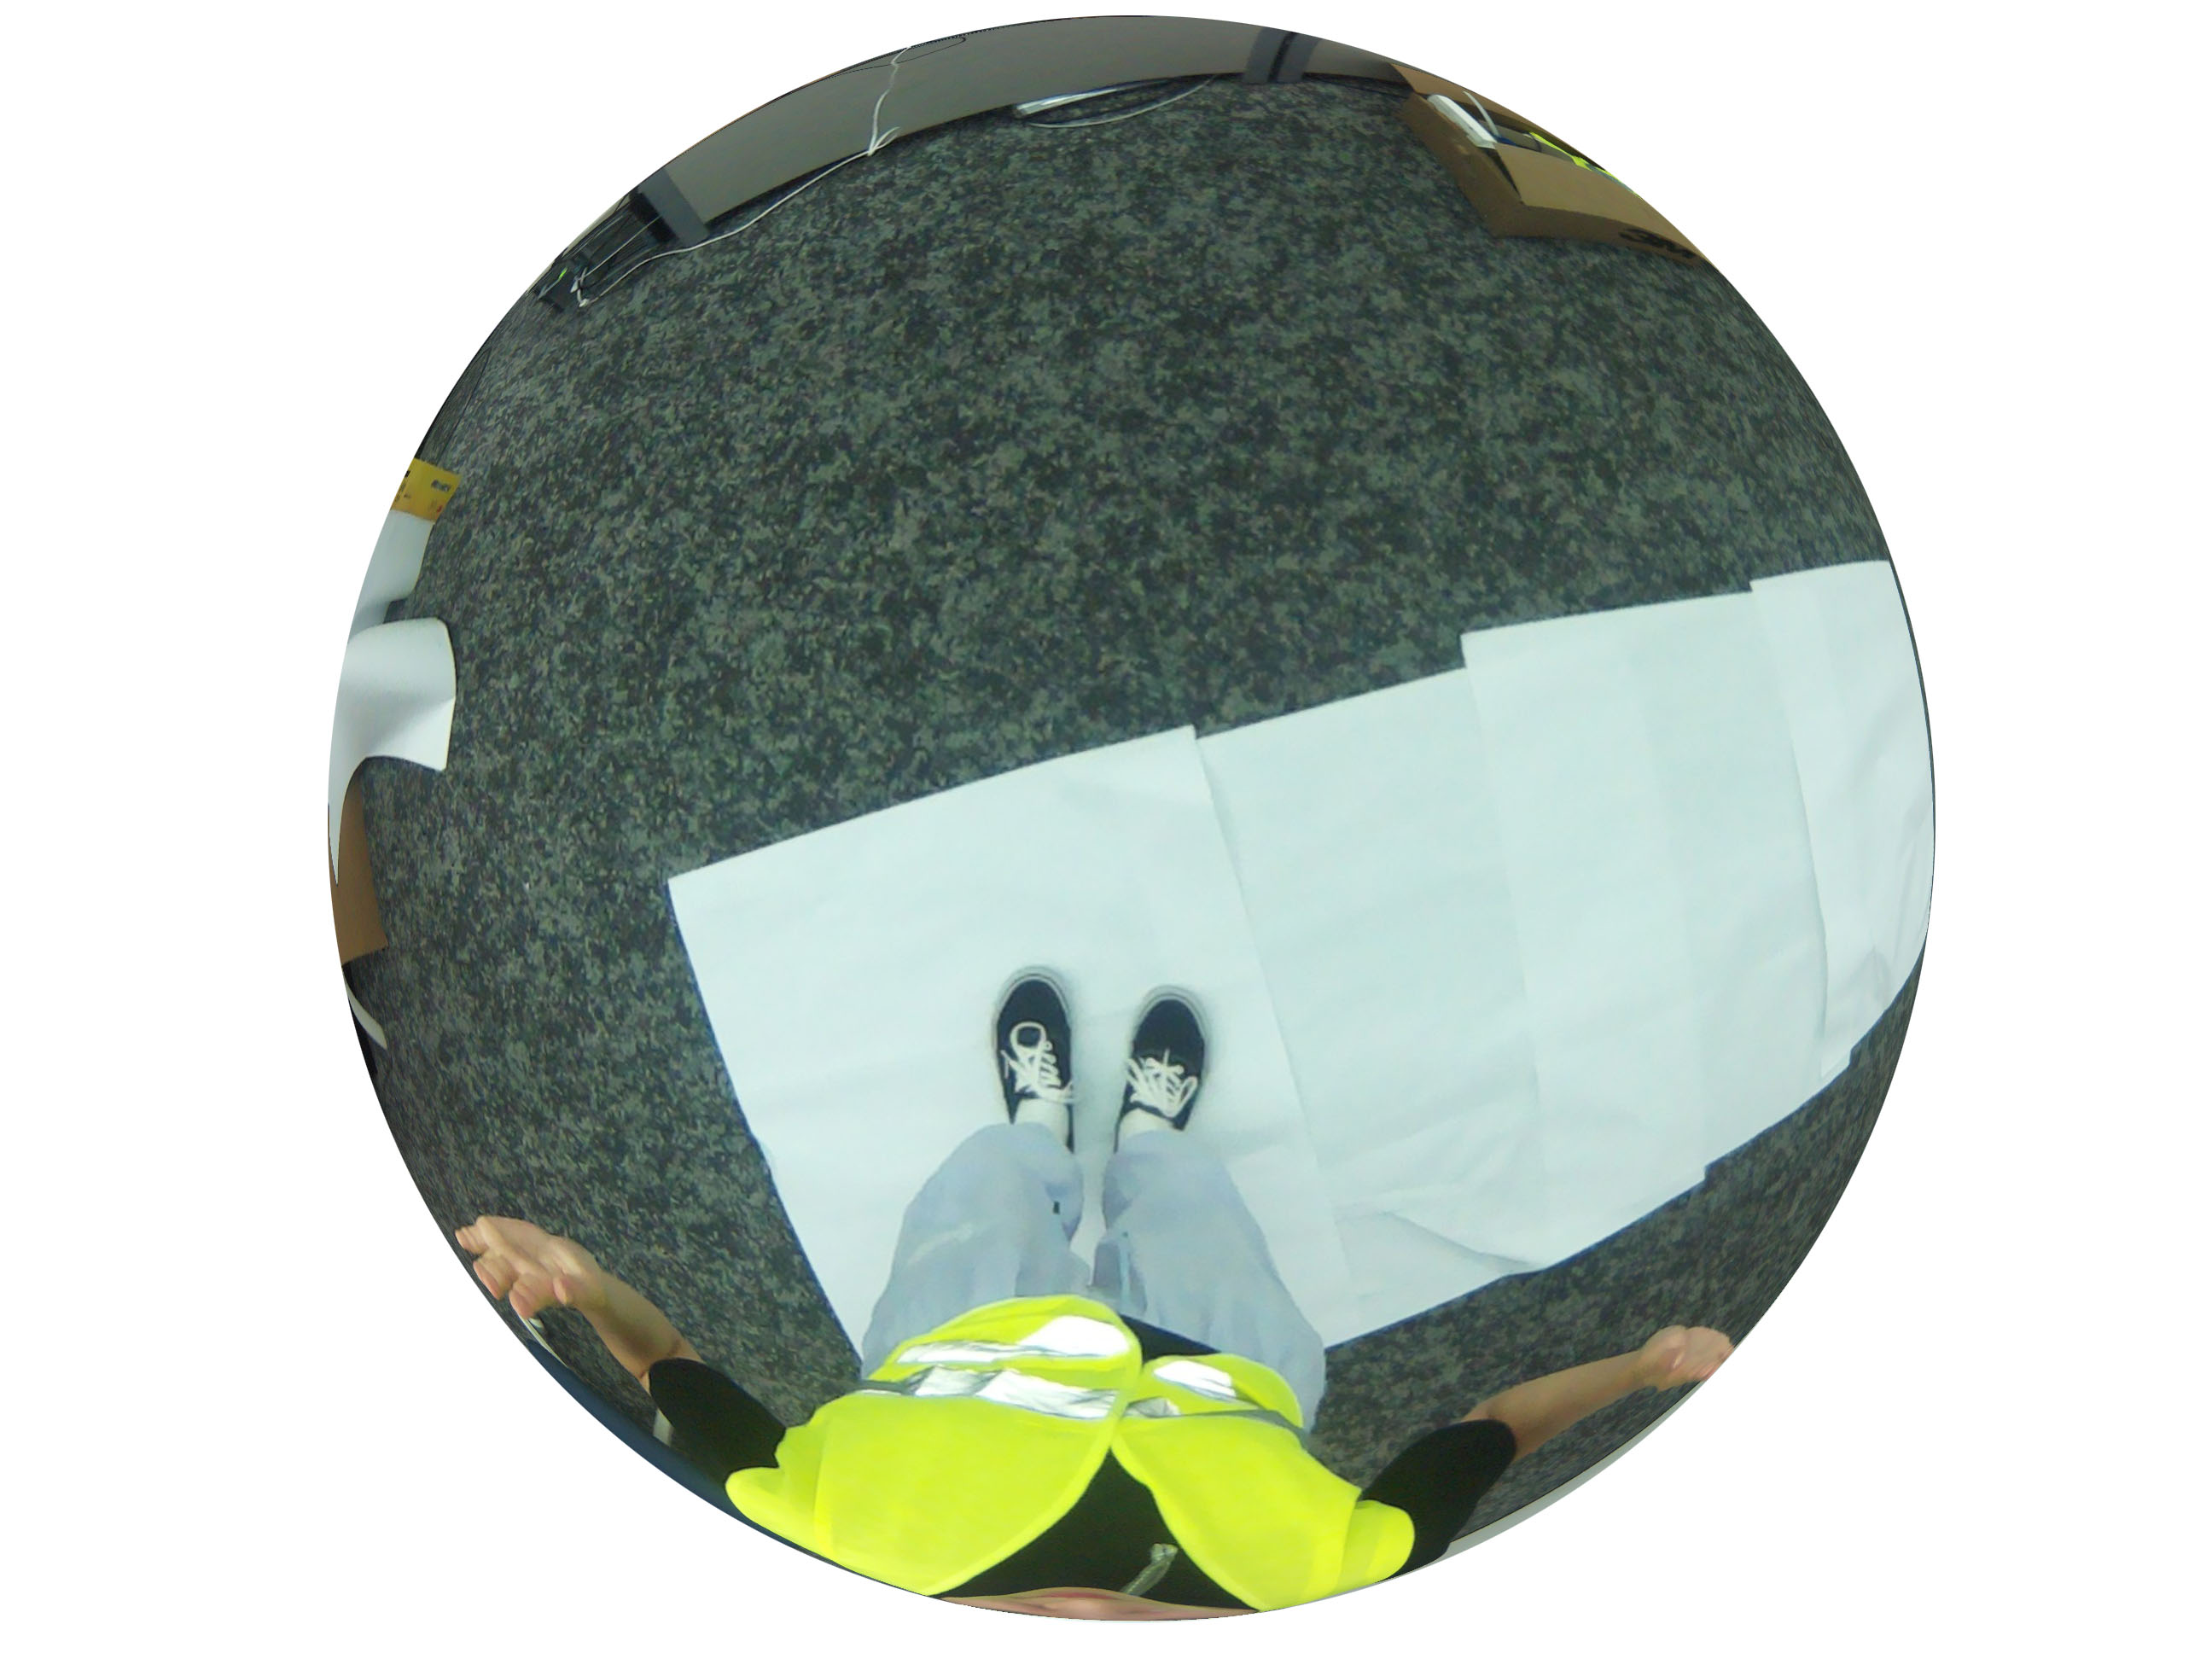

In [4]:
# SceneEgo/data/demo/out
import pickle
import numpy as np

# img_002376
# img_001796
# img_001000
# Pickle 파일 열기
with open('./SceneEgo_folder/EgocentricDepthEstimator_ALL_SUCCESS/data/out/jsh_fish.jpg.pkl', 'rb') as file:
          # ./SceneEgo/data/demo/out/rkj6.jpg.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# 로드된 데이터 사용
loaded_data = np.array(loaded_data)
print(loaded_data)

from PIL import Image
img = Image.open('./SceneEgo_folder/EgocentricDepthEstimator_ALL_SUCCESS/data/imgs/jsh_fish.jpg')
                 # ./SceneEgo/data/demo/imgs/rkj6.jpg')
img

In [9]:
img.size

(2592, 1944)

In [10]:
loaded_data.shape

(15, 3)

In [11]:
import numpy as np
loaded_data = np.array(loaded_data)
loaded_data

array([[ 3.7947752e-02,  2.5033870e-01,  1.2745112e-01],
       [ 1.8998060e-01,  2.8878048e-01,  2.0166610e-01],
       [ 1.4705543e-01,  2.1958150e-01,  3.6373726e-01],
       [ 6.0983565e-02, -8.1049167e-02,  2.5452200e-01],
       [-1.4998329e-01,  2.2878677e-01,  1.7631850e-01],
       [-2.7543798e-01,  3.0148199e-01,  3.4499517e-01],
       [-1.9212298e-01, -6.9474947e-04,  3.4652901e-01],
       [ 6.5618828e-02,  3.3168224e-01,  4.7409746e-01],
       [ 2.9383607e-02, -1.7280753e-01,  6.9006455e-01],
       [-1.6632716e-01, -1.1482759e-01,  8.1242651e-01],
       [-1.5737727e-01, -1.8906376e-01,  1.0617718e+00],
       [-1.4919613e-01,  3.1220019e-01,  5.2519840e-01],
       [-1.6829674e-01,  1.0355077e-01,  7.5514650e-01],
       [-2.0711733e-01,  7.1928561e-02,  6.2564659e-01],
       [-2.1037857e-01, -3.7666049e-02,  6.3938069e-01]], dtype=float32)

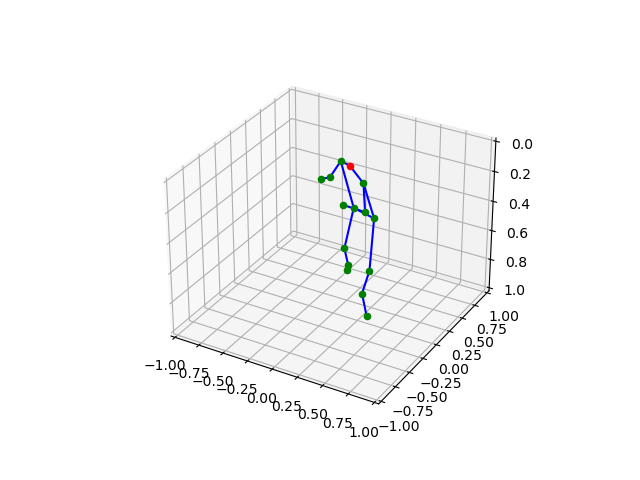

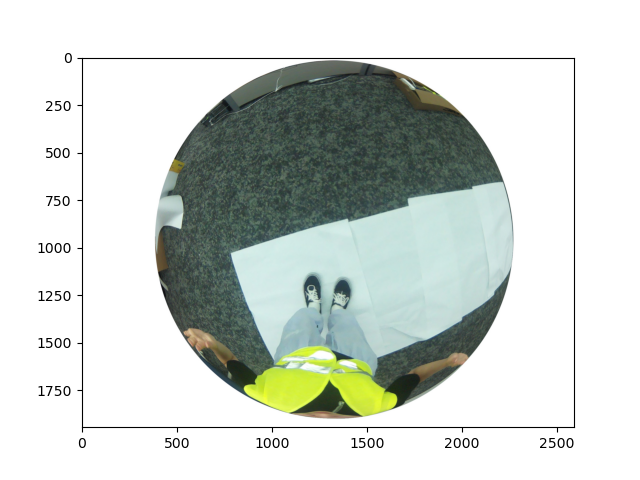

In [5]:
%matplotlib widget

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
i=0
n=0

for x,y,z in loaded_data:
    if i == n:
        ax.scatter3D(x,y,z, color='r' )# 3D scatter plot)
    else:
        ax.scatter3D(x,y,z,color='g')
    i +=1

lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
for i,j in lines:
    x1, y1, z1 = loaded_data[i]
    x2, y2, z2 = loaded_data[j]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1)

# Z 축의 방향을 바꿉니다.
ax.invert_zaxis()

fig2,ax2 = plt.subplots()
plt.imshow(img)

## 3D Skeleton animation으로 만들기
-> 한 번만 하면 앞으로 계속 애니매이션으로 바뀜 주의

### 아래 코드는 애니매이션이 같은 폴더에 저장됨
저장 말고 보고 싶으면 -> 아래 코드 실행시키고 위 코드 실행시키기.

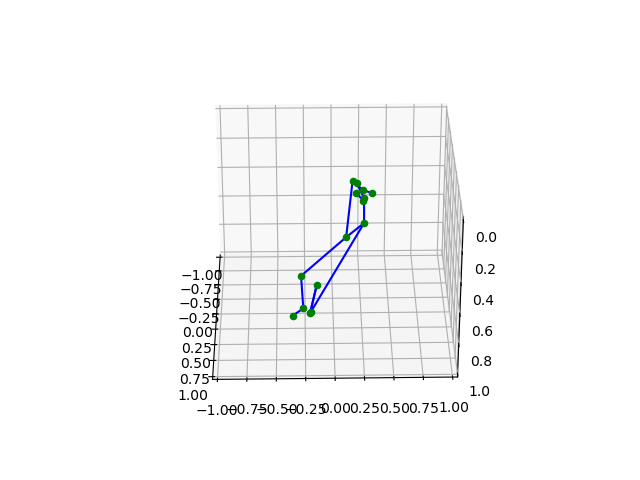

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import animation 
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

def init():

    for x,y,z in loaded_data:
        ax.scatter3D(x,y,z,color='g')
        
    lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
    
    for i,j in lines:
        x1, y1, z1 = loaded_data[i]
        x2, y2, z2 = loaded_data[j]
        ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1)

# Z 축의 방향을 바꿉니다.
ax.invert_zaxis()

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)

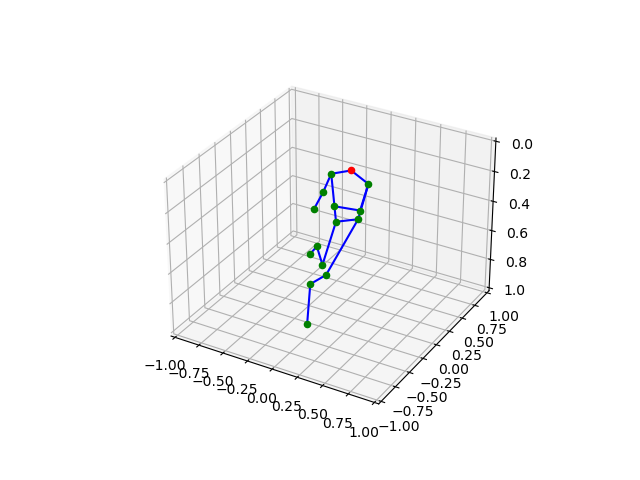

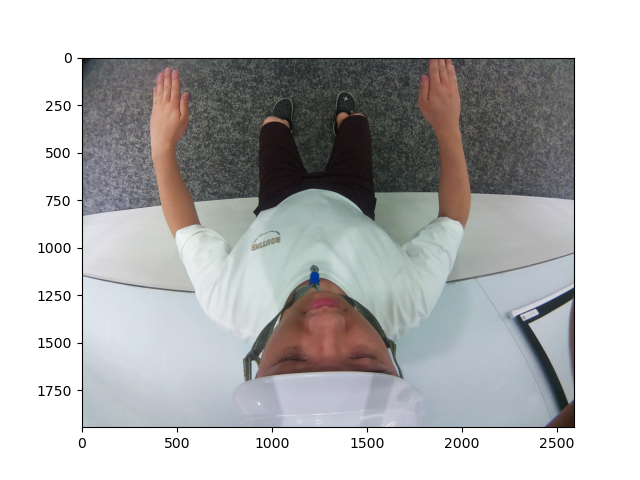

In [13]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(projection='3d')
i=0
n=0
for x,y,z in loaded_data:
    if i == n:
        ax.scatter3D(x,y,z, color='r' )# 3D scatter plot)
    else:
        ax.scatter3D(x,y,z,color='g')
    i +=1
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(0,1)

# 점들을 연결하는 선을 그립니다.
# for i in range(len(loaded_data) - 1):

lines = [(0, 1), (0, 4), (1, 2), (2, 3), (4, 5), (5, 6), (1, 7), (4, 11), 
         (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (7, 11)]
for i,j in lines:
    x1, y1, z1 = loaded_data[i]
    x2, y2, z2 = loaded_data[j]
    ax.plot([x1, x2], [y1, y2], [z1, z2], 'b-')  # 'b-'는 파란색 실선을 의미합니다.

# Z 축의 방향을 바꿉니다.
ax.invert_zaxis()

fig2,ax2 = plt.subplots()
plt.imshow(img)